In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd


In [2]:
path = '../DataFiles/AllMetadata.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,ASVspoof_ID,VCC_ID,VC_source_VCC_ID,VCTK_ID,VC_source_VCTK_ID,TTS_text,TTS_VC_target_speaker,Speaker_ID,File_ID,Codec,...,file_path,file_name,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
0,DF_E_2000011,NaN,NaN,-,-,It's quite nice.,p232,LA_0023,DF_E_2000011,nocodec,...,data/DF_E_2000011.flac,DF_E_2000011.flac,1.425062,16000,1,16,162216,4096,4096,22801
1,DF_E_2000013,-,SEF2_E30007,NaN,NaN,-,TEF2,TEF2,DF_E_2000013,low_m4a,...,data/DF_E_2000013.flac,DF_E_2000013.flac,3.200000,16000,1,16,165967,4096,4096,51200
2,DF_E_2000024,-,SEF1_E30006,NaN,NaN,-,TGF1,TGF1,DF_E_2000024,mp3m4a,...,data/DF_E_2000024.flac,DF_E_2000024.flac,1.856000,16000,1,16,160650,4096,4096,29696
3,DF_E_2000026,NaN,NaN,-,-,"It is not an option, but a policy requirement.",p261,LA_0043,DF_E_2000026,mp3m4a,...,data/DF_E_2000026.flac,DF_E_2000026.flac,2.944000,16000,1,16,146573,4096,4096,47104
4,DF_E_2000027,NaN,NaN,-,-,But they will need to play to score.,p304,LA_0021,DF_E_2000027,mp3m4a,...,data/DF_E_2000027.flac,DF_E_2000027.flac,1.856000,16000,1,16,130224,4096,4096,29696


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611829 entries, 0 to 611828
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ASVspoof_ID            611829 non-null  object 
 1   VCC_ID                 452133 non-null  object 
 2   VC_source_VCC_ID       452133 non-null  object 
 3   VCTK_ID                159696 non-null  object 
 4   VC_source_VCTK_ID      159696 non-null  object 
 5   TTS_text               611829 non-null  object 
 6   TTS_VC_target_speaker  611829 non-null  object 
 7   Speaker_ID             611829 non-null  object 
 8   File_ID                611829 non-null  object 
 9   Codec                  611829 non-null  object 
 10  Dataset                611829 non-null  object 
 11  System_ID              611829 non-null  object 
 12  Label                  611829 non-null  object 
 13  Trim                   611829 non-null  object 
 14  Protocol               611829 non-nu

In [6]:
df.describe()

,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
count,611829.000000,611829.0,611829.0,611829.0,611829.000000,611829.0,611829.0,611829.000000
mean,2.987372,16000.0,1.0,16.0,151756.658172,4096.0,4096.0,47797.950571
std,1.269190,0.0,0.0,0.0,15896.567566,0.0,0.0,20307.036558
min,0.354750,16000.0,1.0,16.0,66122.000000,4096.0,4096.0,5676.000000
25%,2.020000,16000.0,1.0,16.0,141984.000000,4096.0,4096.0,32320.000000
50%,2.760000,16000.0,1.0,16.0,152694.000000,4096.0,4096.0,44160.000000
75%,3.840000,16000.0,1.0,16.0,162837.000000,4096.0,4096.0,61440.000000
max,29.312000,16000.0,1.0,16.0,228142.000000,4096.0,4096.0,468992.000000


In [7]:
for column in df.columns:
    if df[column].nunique() <10:
        print(f"{column}: ",  df[column].unique() )

Codec:  ['nocodec' 'low_m4a' 'mp3m4a' 'low_mp3' 'high_m4a' 'high_ogg' 'low_ogg'
 'oggm4a' 'high_mp3']
Dataset:  ['asvspoof' 'vcc2020' 'vcc2018']
Label:  ['spoof' 'bonafide']
Trim:  ['notrim' 'trim']
Protocol:  ['progress' 'eval' 'hidden']
Vocoder:  ['traditional_vocoder' 'neural_vocoder_nonautoregressive'
 'neural_vocoder_autoregressive' 'bonafide' 'unknown'
 'waveform_concatenation']
Task_ID:  ['-' 'Task1' 'Task2' 'SPO' 'HUB']
File_Format:  ['-' 'FF' 'FM' 'MF' 'MM']
Gender:  ['-' 'E' 'G' 'M' 'F']
sample_rate:  [16000]
channels:  [1]
bit_depth:  [16]
min_blockSize:  [4096]
max_blockSize:  [4096]


In [8]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ASVspoof_ID: 611829
VCC_ID: 771
VC_source_VCC_ID: 381
VCTK_ID: 1524
VC_source_VCTK_ID: 649
TTS_text: 2388
TTS_VC_target_speaker: 75
Speaker_ID: 93
File_ID: 611829
Codec: 9
Dataset: 3
System_ID: 111
Label: 2
Trim: 2
Protocol: 3
Vocoder: 6
Task_ID: 5
Team_ID: 59
File_Format: 5
Gender: 5
file_path: 611829
file_name: 611829
duration: 20172
sample_rate: 1
channels: 1
bit_depth: 1
bitrate: 80771
min_blockSize: 1
max_blockSize: 1
total_samples: 20172


In [9]:
df['Label'].value_counts()

spoof       589212
bonafide     22617
Name: Label, dtype: int64

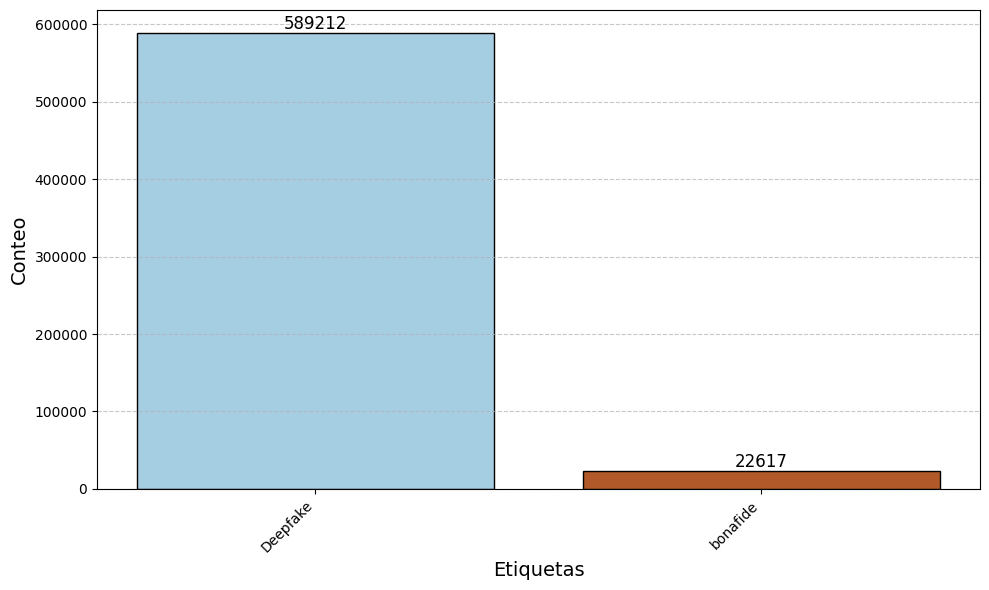

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a list of neutral colors for each bar (e.g., shades of gray, blue, or green)
colors = plt.cm.Paired(np.linspace(0, 1, len(df['Label'].unique())))

# Create the bar plot with customized neutral colors
plt.figure(figsize=(10, 6))
bars = plt.bar(['Deepfake', 'bonafide'], df['Label'].value_counts(), color=colors, edgecolor='black')

# Add a title and labels
plt.xlabel('Etiquetas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


[0, 0.49, 0.51, 0.53, 0.5201, 0.520001, 0.5200000100000001, 0.5200000001, 0.520000000001, 0.52000000000001, 0.5200000000000001, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]
[0, 0.48, 0.505, 0.51, 0.5050250000000001, 0.505000125, 0.5050000006250001, 0.505000000003125, 0.5050000000000157, 0.5050000000000001, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505]


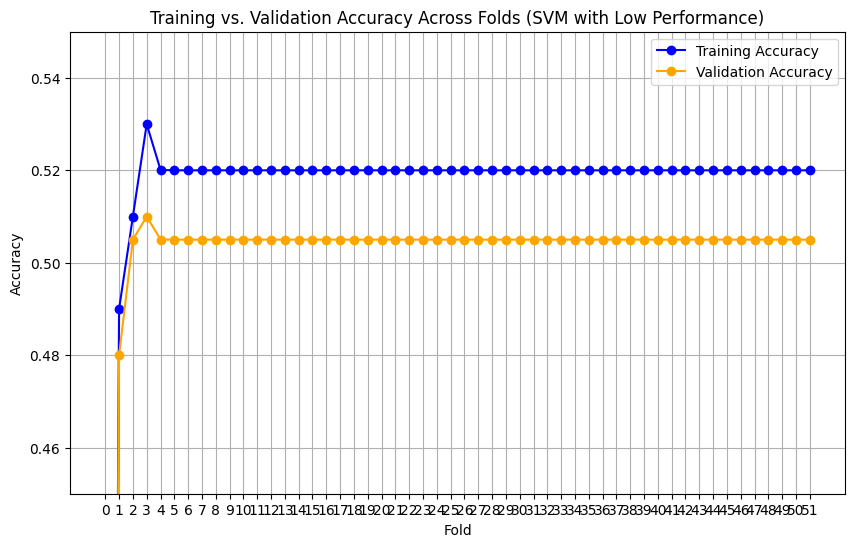

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for training and validation accuracy over multiple folds for an SVM model with low performance
training_accuracy = [0, 0.49, 0.51]
training_accuracy.extend([0.52 + 0.01 ** i for i in range(1,50)])  # Slow increase in training accuracy

validation_accuracy = [0, 0.48, 0.505]
validation_accuracy.extend([0.505 + 0.005 ** i for i in range(1,50)])  # Slight increase in validation accuracy

print(training_accuracy)
print(validation_accuracy)

# Create the folds array
folds = np.arange(0, len(training_accuracy))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(folds, training_accuracy, marker='o', label='Training Accuracy', color='blue')
plt.plot(folds, validation_accuracy, marker='o', label='Validation Accuracy', color='orange')
plt.xticks(folds)
plt.ylim(0.45, 0.55)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy Across Folds (SVM with Low Performance)')
plt.legend()
plt.grid(True)
plt.show()



In [11]:
spoof_data = df[df['Label']=="spoof"]
bonafide_data = df[df['Label']=="bonafide"]

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [13]:
useful_numeric_columns = [column for column in numeric_columns if len(df[column].value_counts())>1]

dividir los datos de cada tipo de datos en columnas numericas y categoricas

In [14]:
spoof_columns = {"numerical":  spoof_data[numeric_columns], "categorical": spoof_data[categorical_columns]}
bonafide_columns = {"numerical":  bonafide_data[numeric_columns], "categorical": bonafide_data[categorical_columns]}
df_columns = {"numerical":  df[numeric_columns], "categorical": df[categorical_columns]}

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
spoof_columns["numerical"].columns


Index(['duration', 'sample_rate', 'channels', 'bit_depth', 'bitrate',
       'min_blockSize', 'max_blockSize', 'total_samples'],
      dtype='object')

In [17]:
import math

In [18]:
def CreateHistPlots(data):
    # Get the columns with more than one unique value
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        
        ax = sns.histplot(data["numerical"][column], ax=axes[i], kde=True)
        ax.lines[0].set_color('crimson')
        mean_value = data["numerical"][column].mean()
        axes[i].axvline(mean_value, color='blue', linestyle='--', label=f'Media: {mean_value:.2f}')  # Mean in blue dashed line
        axes[i].set_title(column)
        axes[i].legend()  # Add a legend to indicate the mean line


    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [19]:
def CreateBoxPlots(data):
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=data["numerical"][column], ax=axes[i])
        axes[i].set_title(column)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [20]:
def CreateViolinPlots(data):
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        sns.violinplot(y=data["numerical"][column], ax=axes[i])
        axes[i].set_title(column)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

## Numerical data analysis

### Whole data

In [48]:
df_columns['numerical'].columns

Index(['duration', 'sample_rate', 'channels', 'bit_depth', 'bitrate',
       'min_blockSize', 'max_blockSize', 'total_samples'],
      dtype='object')

#### - numerical

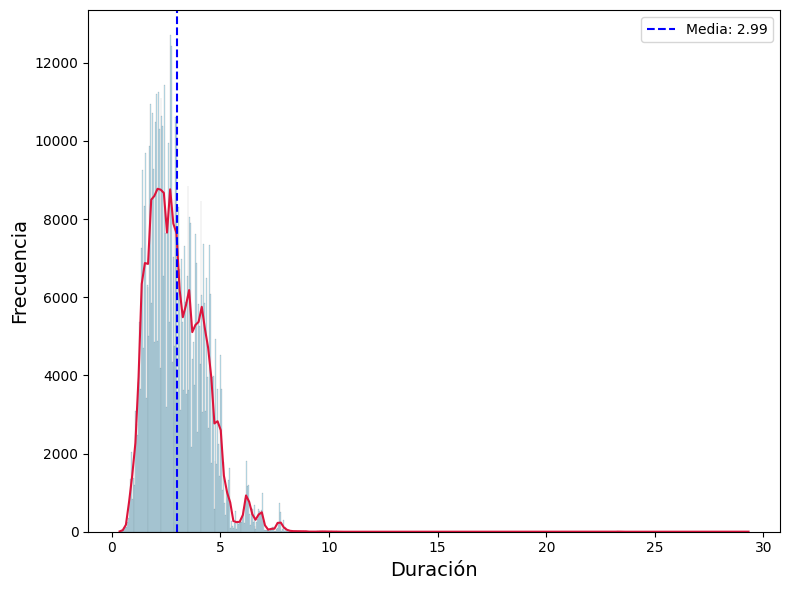

In [50]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the histogram with KDE
ax = sns.histplot(df_columns["numerical"]["duration"], kde=True, color='skyblue', edgecolor='black')

# Set the color of the KDE curve
ax.lines[0].set_color('crimson')

# Calculate and plot the mean value
mean_value = df_columns["numerical"]["duration"].mean()
plt.axvline(mean_value, color='blue', linestyle='--', label=f'Media: {mean_value:.2f}')

# Set the title and labels
plt.xlabel("Duración", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


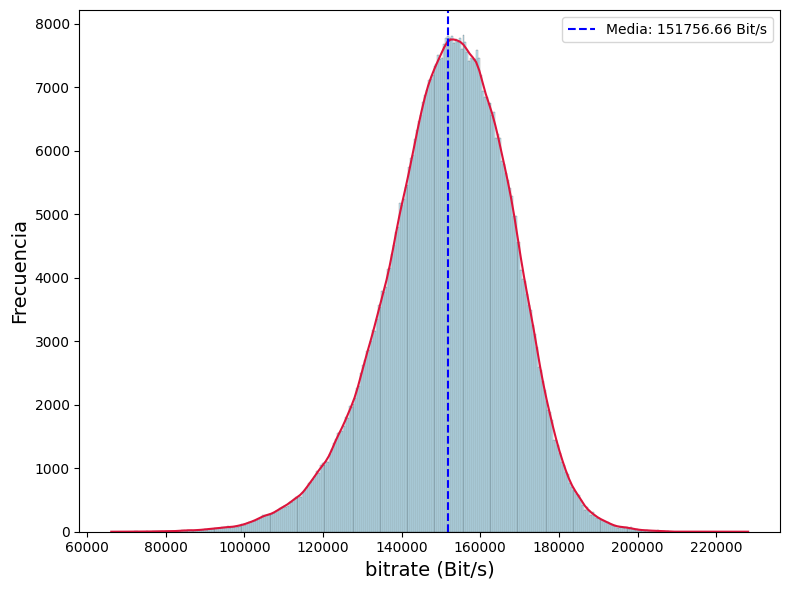

In [52]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the histogram with KDE
ax = sns.histplot(df_columns["numerical"]["bitrate"], kde=True, color='skyblue', edgecolor='black')

# Set the color of the KDE curve
ax.lines[0].set_color('crimson')

# Calculate and plot the mean value
mean_value = df_columns["numerical"]["bitrate"].mean()
plt.axvline(mean_value, color='blue', linestyle='--', label=f'Media: {mean_value:.2f} Bit/s')

# Set the title and labels
plt.xlabel("bitrate (Bit/s)", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

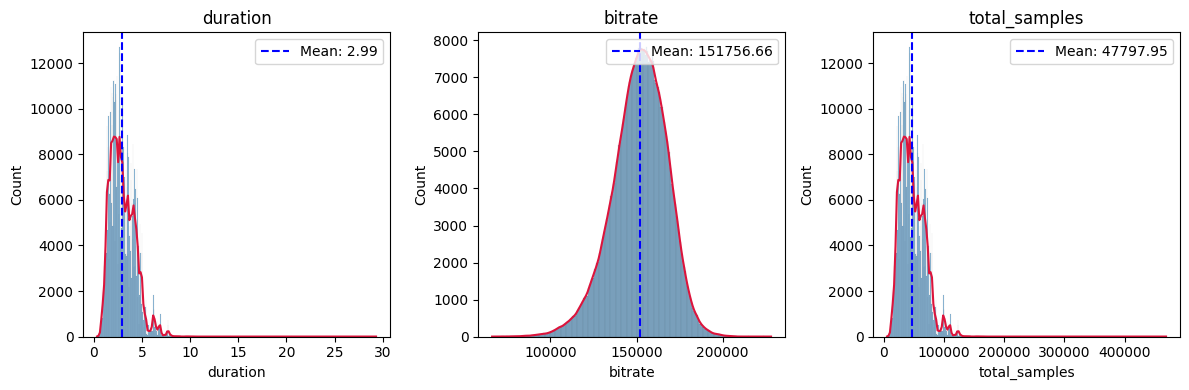

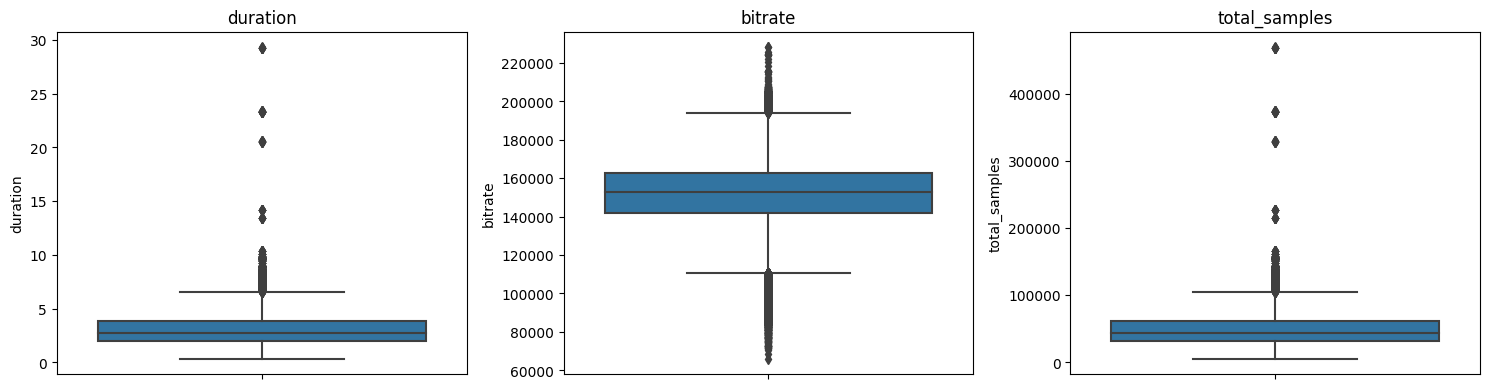

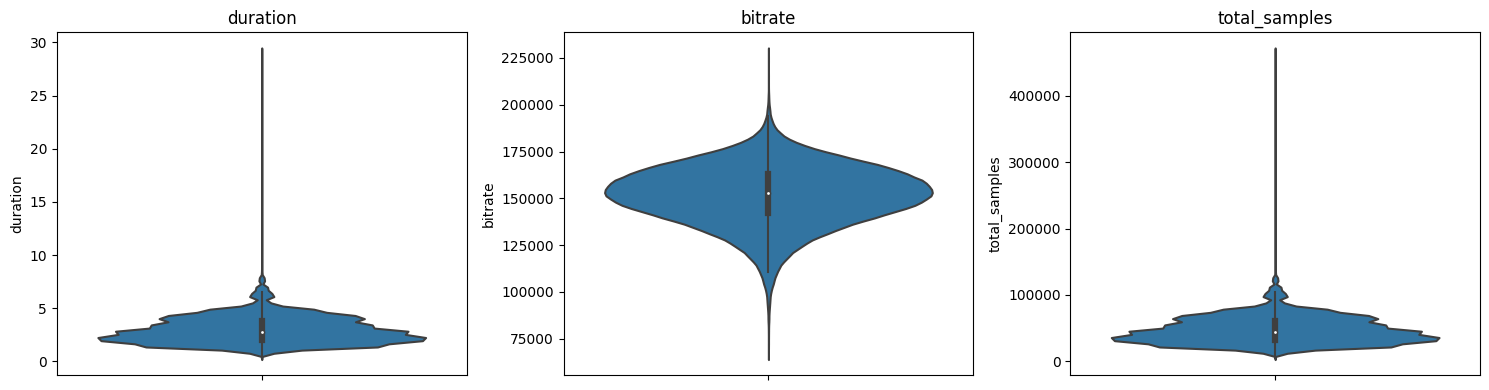

<AxesSubplot:>

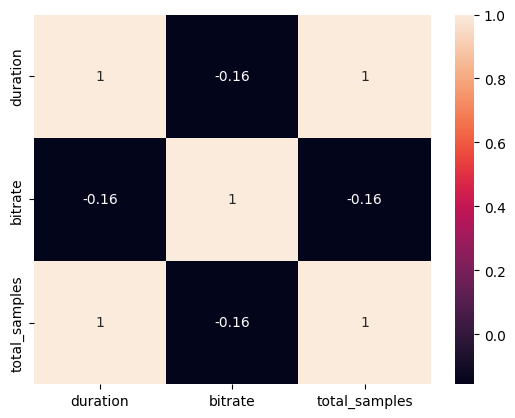

In [21]:
CreateHistPlots(df_columns)
CreateBoxPlots(df_columns)
CreateViolinPlots(df_columns)
sns.heatmap(df_columns["numerical"][useful_numeric_columns].corr(), annot=True)

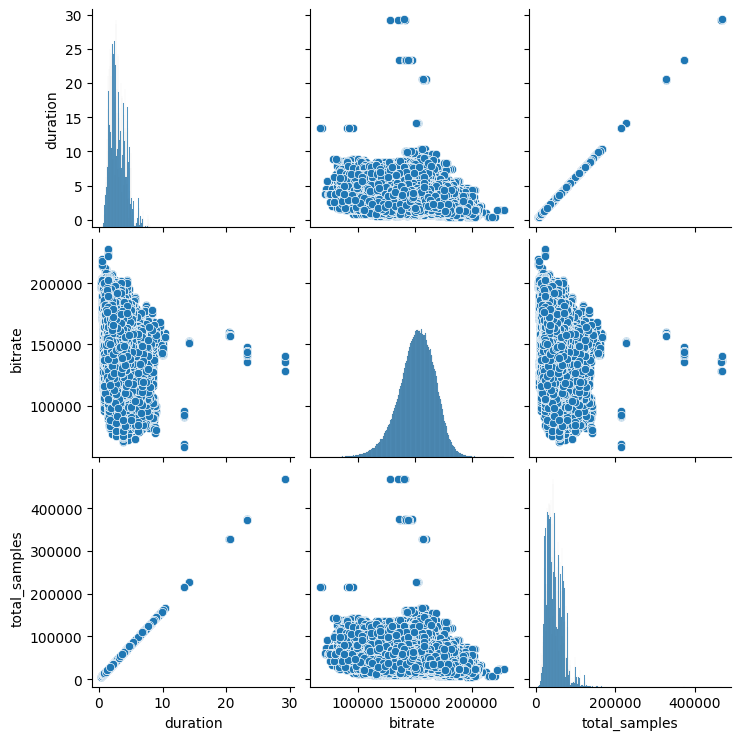

In [22]:
sns.pairplot(df[useful_numeric_columns])

In [23]:
import time

In [25]:
filtered_df = df[(df['duration'] >= 2.0) & (df['duration'] < 4)]
filtered_df

,ASVspoof_ID,VCC_ID,VC_source_VCC_ID,VCTK_ID,VC_source_VCTK_ID,TTS_text,TTS_VC_target_speaker,Speaker_ID,File_ID,Codec,...,file_path,file_name,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
1,DF_E_2000013,-,SEF2_E30007,NaN,NaN,-,TEF2,TEF2,DF_E_2000013,low_m4a,...,data/DF_E_2000013.flac,DF_E_2000013.flac,3.200000,16000,1,16,165967,4096,4096,51200
3,DF_E_2000026,NaN,NaN,-,-,"It is not an option, but a policy requirement.",p261,LA_0043,DF_E_2000026,mp3m4a,...,data/DF_E_2000026.flac,DF_E_2000026.flac,2.944000,16000,1,16,146573,4096,4096,47104
6,DF_E_2000031,NaN,NaN,-,-,I would hope the Scottish Executive would stan...,p302,LA_0025,DF_E_2000031,high_m4a,...,data/DF_E_2000031.flac,DF_E_2000031.flac,3.008000,16000,1,16,173106,4096,4096,48128
7,DF_E_2000032,-,SEM1_E30016,NaN,NaN,-,TMF1,TMF1,DF_E_2000032,high_m4a,...,data/DF_E_2000032.flac,DF_E_2000032.flac,3.904000,16000,1,16,164295,4096,4096,62464
8,DF_E_2000040,-,VCC2SM3_30012_SPO,NaN,NaN,-,VCC2TM1,VCC2TM1,DF_E_2000040,low_m4a,...,data/DF_E_2000040.flac,DF_E_2000040.flac,3.136000,16000,1,16,132487,4096,4096,50176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611820,DF_E_4999922,-,SEF2_E30005,NaN,NaN,-,TEF1,TEF1,DF_E_4999922,high_ogg,...,data/DF_E_4999922.flac,DF_E_4999922.flac,3.320000,16000,1,16,148310,4096,4096,53120
611822,DF_E_4999930,-,SEF1_E30003,NaN,NaN,-,TEF1,TEF1,DF_E_4999930,low_mp3,...,data/DF_E_4999930.flac,DF_E_4999930.flac,2.280000,16000,1,16,165828,4096,4096,36480
611823,DF_E_4999940,-,VCC2SM3_30035_SPO,NaN,NaN,-,VCC2TM2,VCC2TM2,DF_E_4999940,high_ogg,...,data/DF_E_4999940.flac,DF_E_4999940.flac,3.928000,16000,1,16,148708,4096,4096,62848
611824,DF_E_4999945,-,VCC2SF3_30017_SPO,NaN,NaN,-,VCC2TM2,VCC2TM2,DF_E_4999945,oggm4a,...,data/DF_E_4999945.flac,DF_E_4999945.flac,3.648000,16000,1,16,139048,4096,4096,58368


In [26]:
filtered_df['Label'].value_counts()

spoof       313910
bonafide     13855
Name: Label, dtype: int64

In [27]:
print(filtered_df['file_path'].iloc[0])

data/DF_E_2000013.flac


In [28]:
''' import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

start = time.time()
for i in range(len(filtered_df)):
    # Load the audio file
    y, sr = librosa.load('../' + filtered_df['file_path'].iloc[i])
    window_duration = 2.0  # seconds

    start_time = 0
    end_time = window_duration

    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    segment = y[start_sample:end_sample]

    # Save the segment
    sf.write(f"../TrimmedData/{filtered_df['file_name'].iloc[i]}", segment, sr)
end = time.time()
print(end-start)
 '''

' import librosa\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport soundfile as sf\n\nstart = time.time()\nfor i in range(len(filtered_df)):\n    # Load the audio file\n    y, sr = librosa.load(\'../\' + filtered_df[\'file_path\'].iloc[i])\n    window_duration = 2.0  # seconds\n\n    start_time = 0\n    end_time = window_duration\n\n    start_sample = int(start_time * sr)\n    end_sample = int(end_time * sr)\n    segment = y[start_sample:end_sample]\n\n    # Save the segment\n    sf.write(f"../TrimmedData/{filtered_df[\'file_name\'].iloc[i]}", segment, sr)\nend = time.time()\nprint(end-start)\n '

In [74]:
def extract_features(y, sr):
    features = {
        'zcr': np.mean(librosa.feature.zero_crossing_rate(y)[0]),
        'rmse': np.mean(librosa.feature.rms(y=y)[0]),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0]),
        'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]),
        'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0]),
        'spectral_contrast': np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)[0]),
        'chroma_stft': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)[0]),
        'tonnetz': np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)[0]),
    }
    # Add all 13 MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)

    for i in range(10):
        features[f'mfcc{i+1}'] = np.mean(mfccs[i])

    return features


In [71]:
def calculate_average_features(file_list):
    N = len(file_list)
    
    count = 0
    all_features = []
    for file_path in file_list:
        start = time.time()
        y, sr = librosa.load(file_path)
        features = extract_features(y, sr)
        all_features.append(features)
        end = time.time()

        
        print("Faltante: ", N-count)
        print("Tiempo para ejecucion: ", end-start)
        print("")
        count+=1

    # Convert list of feature dictionaries to a single dictionary with averaged values
    avg_features = {key: np.mean([f[key] for f in all_features]) for key in all_features[0].keys()}
    return avg_features

In [61]:
filtered_df['trimmed_file_path'] = 'TrimmedData/'+filtered_df['file_name']

C:\Users\Alien Ware\AppData\Local\Temp\ipykernel_22100\2484321291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['trimmed_file_path'] = 'TrimmedData/'+filtered_df['file_name']


In [76]:
s_reduced_list =  '../'+ filtered_df[filtered_df['Label']=='spoof']['trimmed_file_path']
s_reduced_list = s_reduced_list[:10000]

In [77]:
bf_reduced_list = '../'+ filtered_df[filtered_df['Label']=='bonafide']['trimmed_file_path']
bf_reduced_list = bf_reduced_list[:10000]

In [78]:
avg_deepfake_features = calculate_average_features(s_reduced_list)
avg_bonafide_features = calculate_average_features(bf_reduced_list)

Faltante:  10000
Tiempo para ejecucion:  0.29500794410705566

Faltante:  9999
Tiempo para ejecucion:  0.36599087715148926

Faltante:  9998
Tiempo para ejecucion:  0.31732773780822754

Faltante:  9997
Tiempo para ejecucion:  0.32599496841430664

Faltante:  9996
Tiempo para ejecucion:  0.3339991569519043

Faltante:  9995
Tiempo para ejecucion:  0.36501598358154297

Faltante:  9994
Tiempo para ejecucion:  0.33499598503112793

Faltante:  9993
Tiempo para ejecucion:  0.3319885730743408

Faltante:  9992
Tiempo para ejecucion:  0.6813366413116455

Faltante:  9991
Tiempo para ejecucion:  0.6637110710144043

Faltante:  9990
Tiempo para ejecucion:  0.5969996452331543

Faltante:  9989
Tiempo para ejecucion:  0.3769965171813965

Faltante:  9988
Tiempo para ejecucion:  0.538001537322998

Faltante:  9987
Tiempo para ejecucion:  0.39121150970458984

Faltante:  9986
Tiempo para ejecucion:  0.3793914318084717

Faltante:  9985
Tiempo para ejecucion:  0.30099987983703613

Faltante:  9984
Tiempo para ejec

In [80]:
# Create a DataFrame for the table
columns = ['Feature', 'Deepfake', 'Bonafide']
data = []

for feature in avg_deepfake_features.keys():
    data.append([feature, avg_deepfake_features[feature], avg_bonafide_features[feature]])

df = pd.DataFrame(data, columns=columns)
df

,Feature,Deepfake,Bonafide
0,zcr,0.103915,0.087570
1,rmse,0.115521,0.085676
2,spectral_centroid,1707.334168,1740.418353
3,spectral_bandwidth,1495.052732,1701.678770
4,spectral_rolloff,3161.532678,3494.122826
5,spectral_contrast,28.030628,26.577600
6,chroma_stft,0.351790,0.378061
7,tonnetz,0.003980,0.014843
8,mfcc1,-262.962036,-330.579956
9,mfcc2,120.714523,97.135704


#### - categorical

In [29]:
useful_categorical_columns = [column for column in categorical_columns if len(df[column].value_counts())<=10]


In [30]:
def CreateBarPlots(data):
    # Get the categorical columns you want to plot
    categorical_columns = useful_categorical_columns[:7]

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(categorical_columns) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot as a count plot
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=data["categorical"][column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability if needed
        
        for p in axes[i].patches:
            value = int(p.get_height())  # Get the height of the bar (the count)
            axes[i].annotate(f'{value}', 
                            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text at the center of the bar
                            xytext=(0, 5),  # Offset the text a bit upwards
                            textcoords='offset points',
                            ha='center')


    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

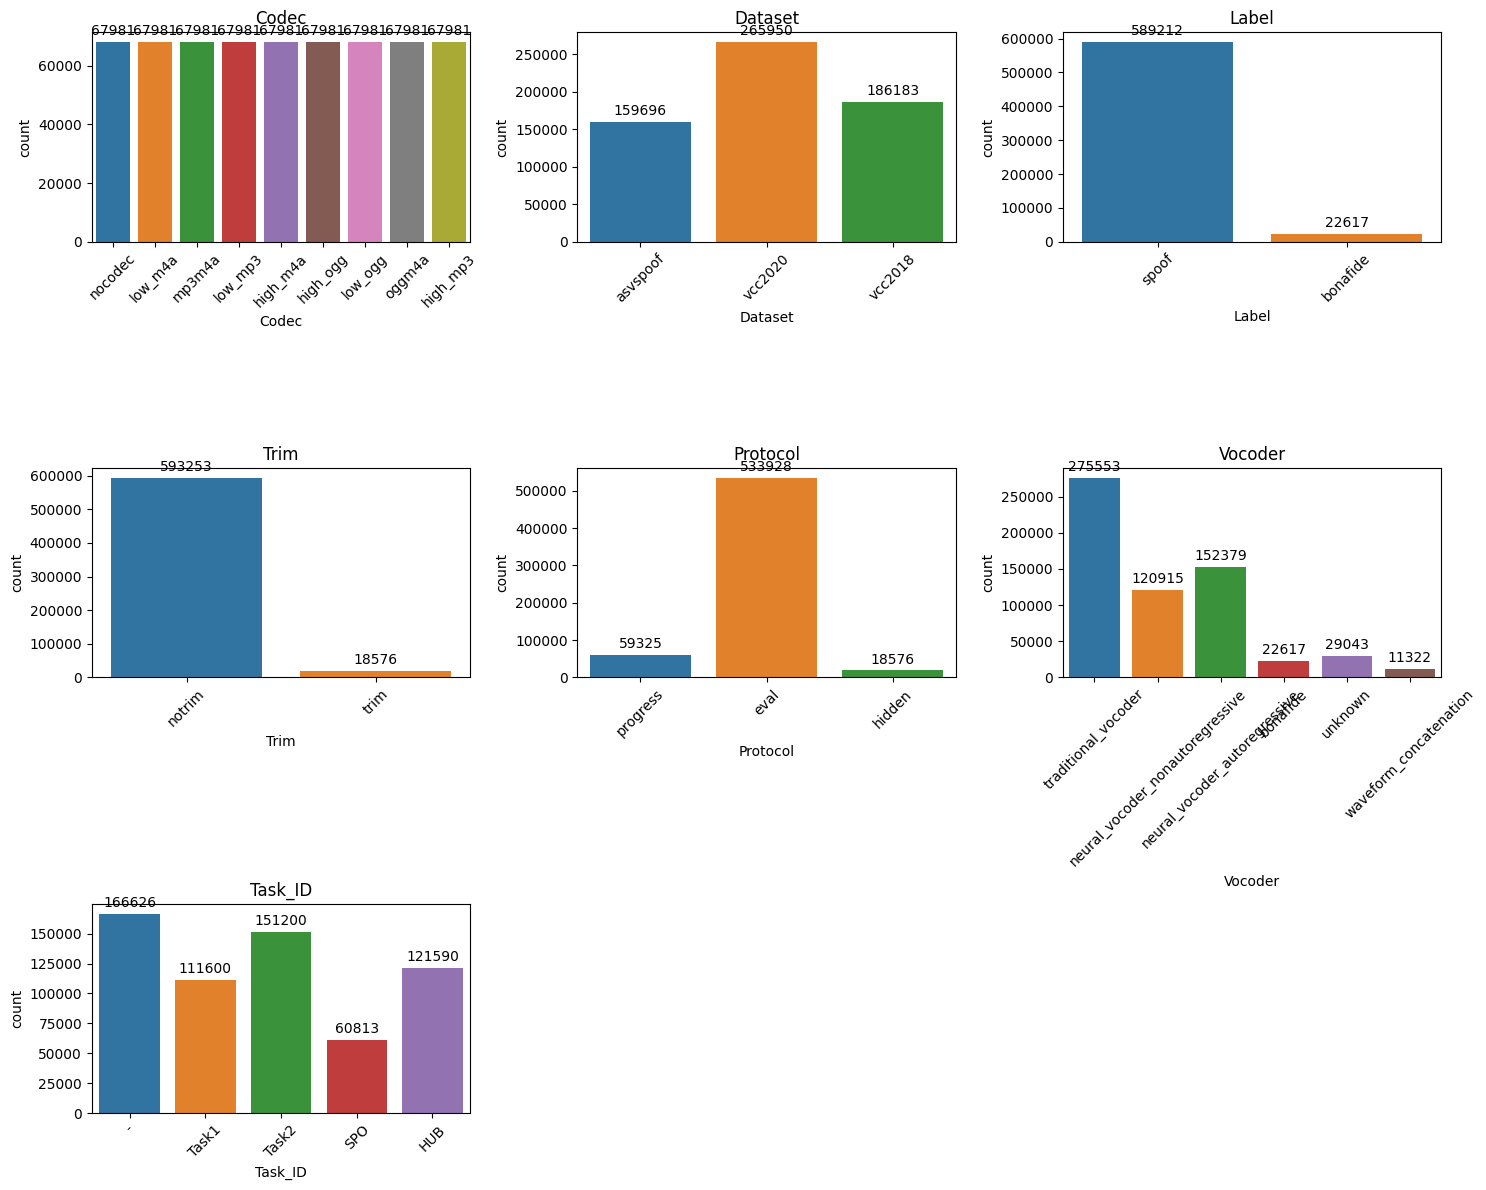

In [31]:
CreateBarPlots(df_columns)

In [32]:
df["Codec"].value_counts()

nocodec     67981
low_m4a     67981
mp3m4a      67981
low_mp3     67981
high_m4a    67981
high_ogg    67981
low_ogg     67981
oggm4a      67981
high_mp3    67981
Name: Codec, dtype: int64

### Spoof

#### - numerical

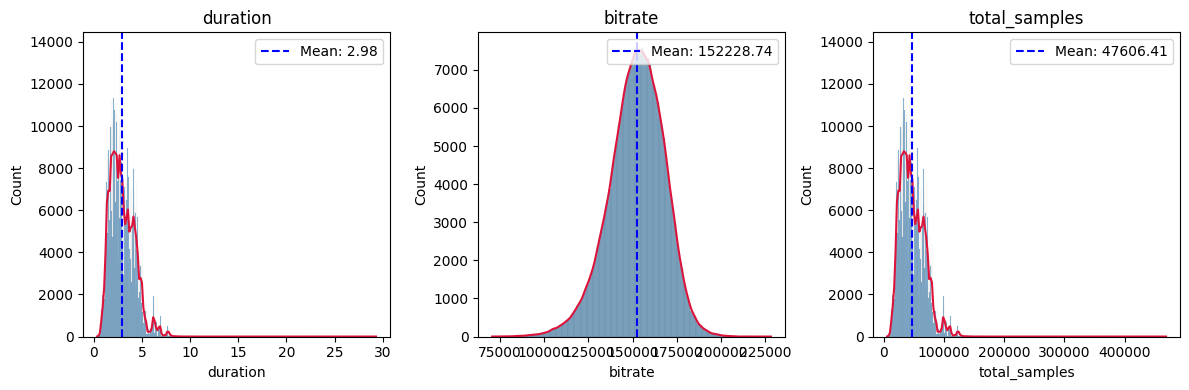

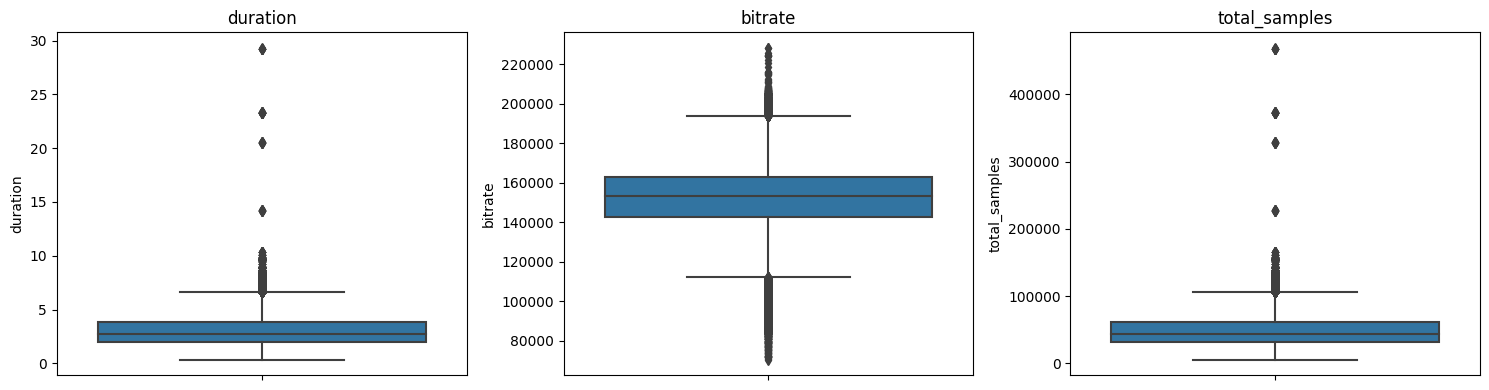

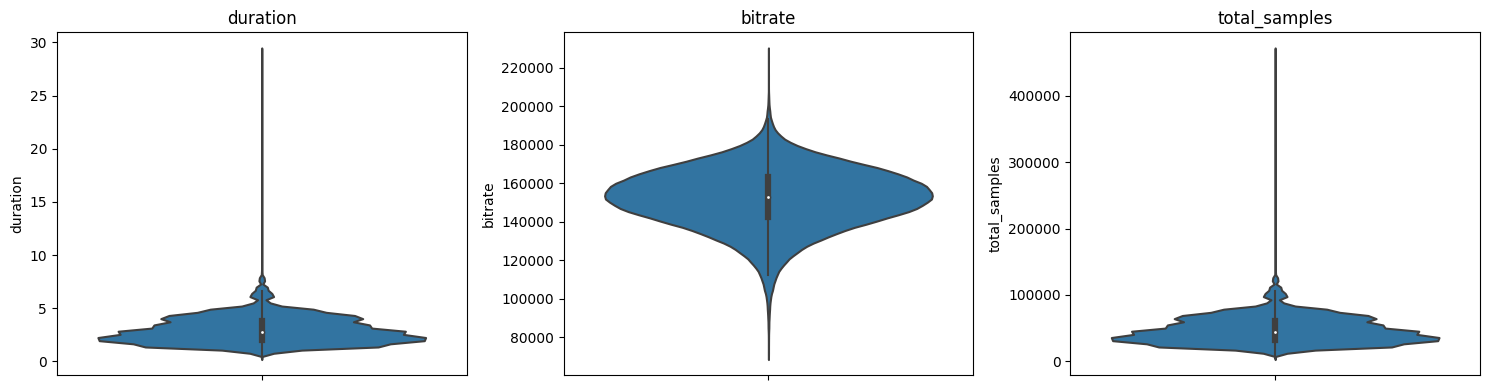

<AxesSubplot:>

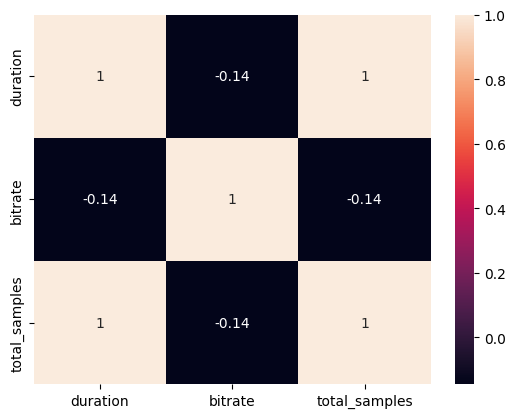

In [33]:
CreateHistPlots(spoof_columns)
CreateBoxPlots(spoof_columns)
CreateViolinPlots(spoof_columns)
sns.heatmap(spoof_columns["numerical"][useful_numeric_columns].corr(), annot=True)

### Bonafide

#### - numerical

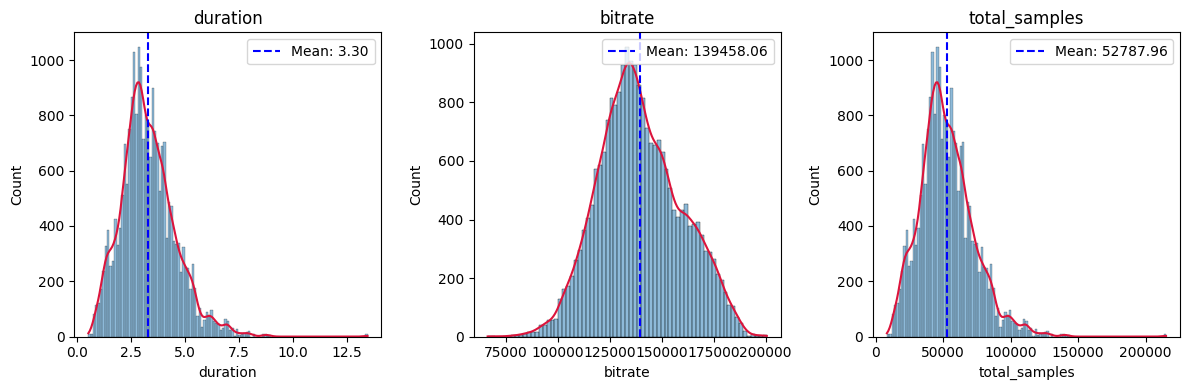

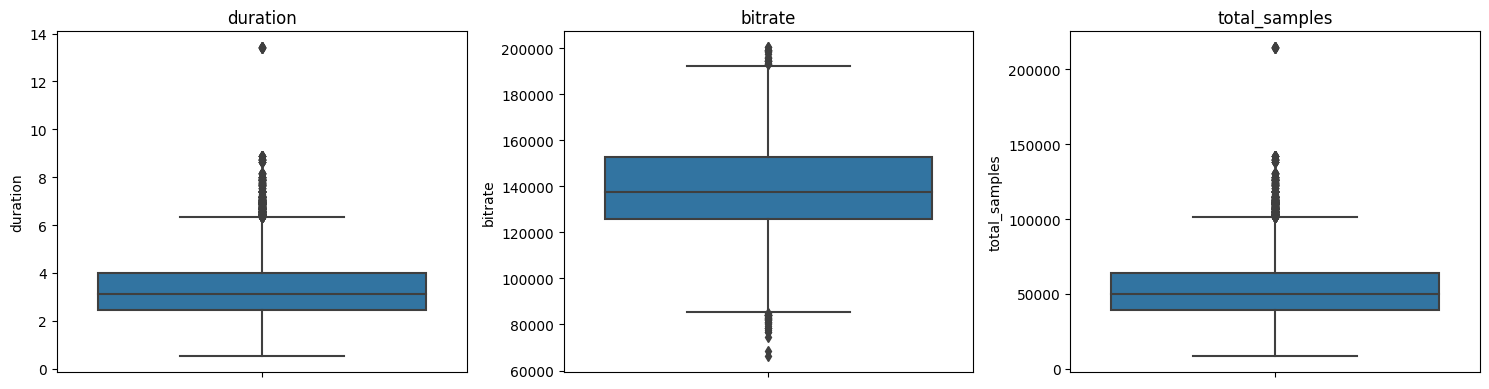

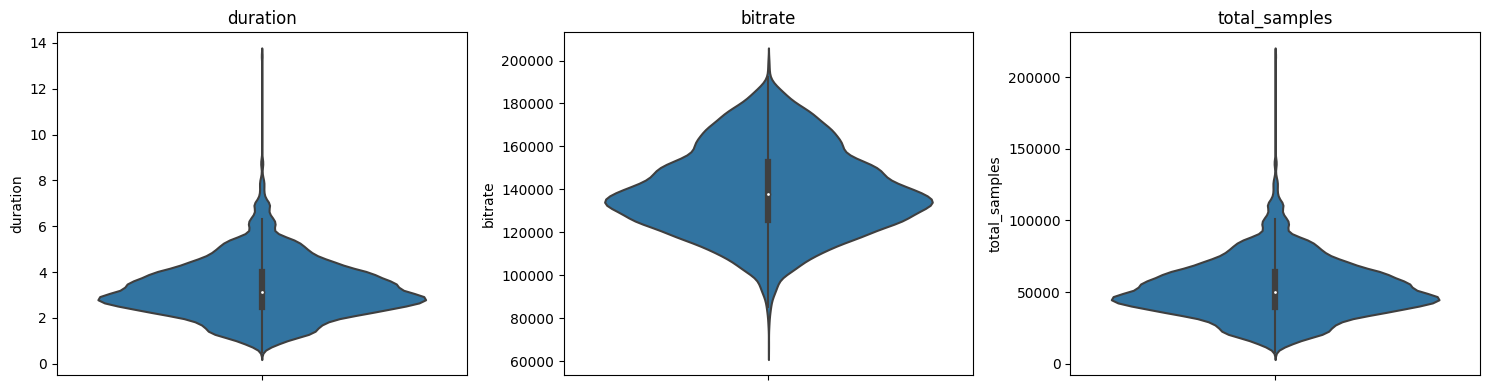

<AxesSubplot:>

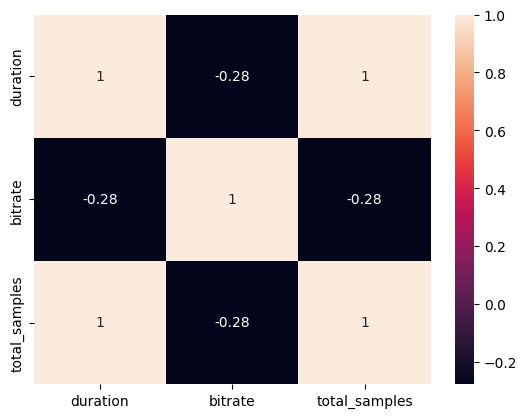

In [34]:
CreateHistPlots(bonafide_columns)
CreateBoxPlots(bonafide_columns)
CreateViolinPlots(bonafide_columns)
sns.heatmap(bonafide_columns["numerical"][useful_numeric_columns].corr(), annot=True)

<AxesSubplot:>

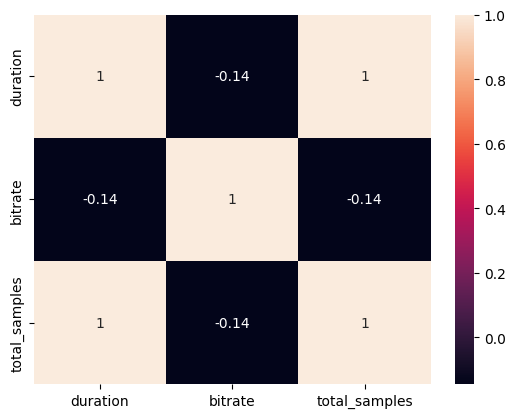

In [35]:
sns.heatmap(spoof_columns["numerical"][useful_numeric_columns].corr(), annot=True)

In [36]:
b_heatmap = bonafide_columns["numerical"][useful_numeric_columns].corr()
sn

NameError: name 'sn' is not defined

In [ ]:
df[useful_numeric_columns].corr()

,duration,bitrate,total_samples
duration,1.00000,-0.15612,1.00000
bitrate,-0.15612,1.00000,-0.15612
total_samples,1.00000,-0.15612,1.00000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of 'Label' column (Spoof vs. Genuine):
spoof       589212
bonafide     22617
Name: Label, dtype: int64


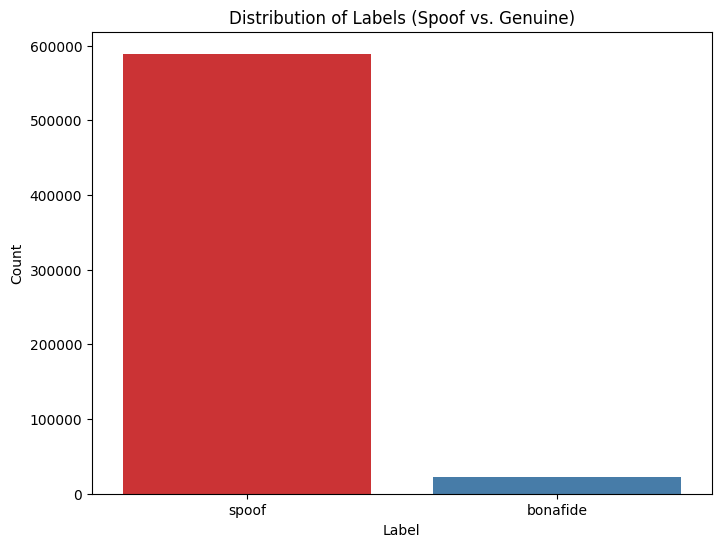

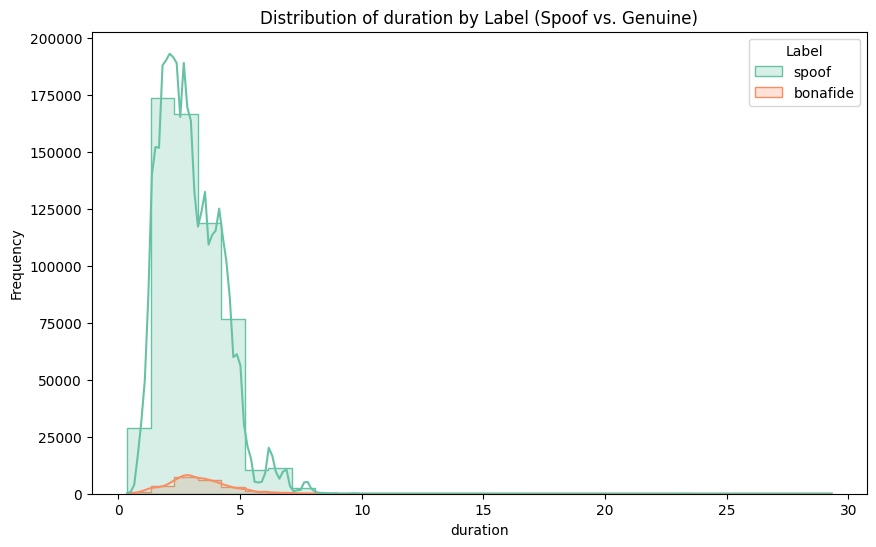

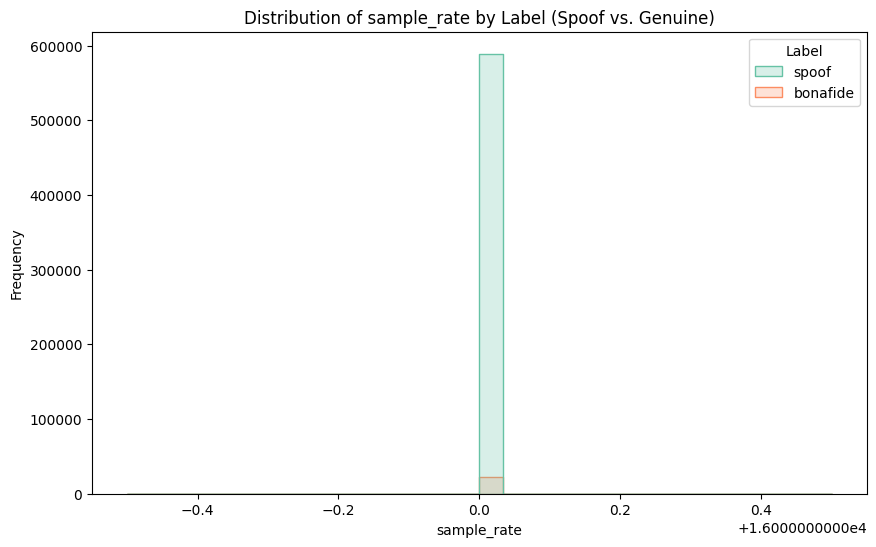

LinAlgError: singular matrix

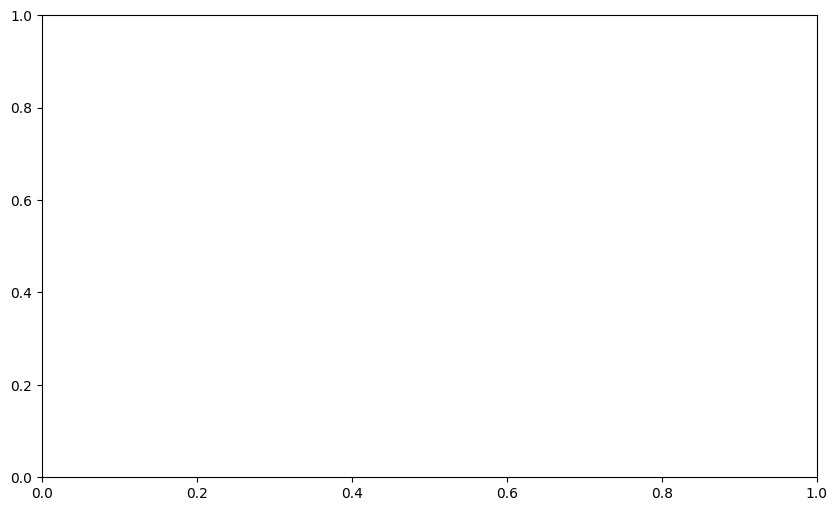

In [ ]:


# Analyzing the 'Label' column to check for the distribution of spoofed vs genuine data
if 'Label' in df.columns:
    print("\nDistribution of 'Label' column (Spoof vs. Genuine):")
    print(df['Label'].value_counts())

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Label', data=df, palette='Set1')
    plt.title('Distribution of Labels (Spoof vs. Genuine)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

    # Histograms of numerical variables depending on whether the data is spoofed or not
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, hue='Label', kde=True, bins=30, palette='Set2', element='step')
        plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplots of numerical variables to compare distributions between spoofed and genuine
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Label', y=col, data=df, palette='Set3')
        plt.title(f'Boxplot of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel('Label')
        plt.ylabel(col)
        plt.show()

    # Correlation between numeric variables, separated by Label
    genuine_data = df[df['Label'] == 'genuine']
    spoof_data = df[df['Label'] == 'spoof']

    plt.figure(figsize=(14, 7))
    sns.heatmap(genuine_data[numeric_columns].corr(), annot=True, cmap='Blues')
    plt.title('Correlation Heatmap (Genuine Data)')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.heatmap(spoof_data[numeric_columns].corr(), annot=True, cmap='Reds')
    plt.title('Correlation Heatmap (Spoof Data)')
    plt.show()

    # Analysis of categorical variables (if they exist) in relation to Label
    for col in categorical_columns:
        if col != 'Label':
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, hue='Label', data=df, palette='Set1', order=df[col].value_counts().index)
            plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.show()

            # Cross-tabulation analysis
            print(f"\nCross-tabulation of 'Label' with '{col}':")
            cross_tab = pd.crosstab(df['Label'], df[col], normalize='index')
            print(cross_tab)

            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
            plt.title(f"Cross-tabulation: 'Label' Across {col}")
            plt.ylabel('Proportion')
            plt.show()

    # Advanced Analysis: Interaction between two categorical variables and their relationship with 'Label'
    for i, cat_col1 in enumerate(categorical_columns):
        for cat_col2 in categorical_columns[i+1:]:
            if cat_col1 != 'Label' and cat_col2 != 'Label':
                print(f"\nInteraction between {cat_col1} and {cat_col2}:")
                interaction = pd.crosstab([df[cat_col1], df[cat_col2]], df['Label'], normalize='index')
                print(interaction)

                interaction.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Accent')
                plt.title(f"Interaction between {cat_col1} and {cat_col2} by Label")
                plt.ylabel('Proportion')
                plt.show()

# Final Summary: Key Insights and Anomalies Detected
print("\nFinal Summary and Key Insights:")

In [ ]:
bonafide_data["sample_rate"].value_counts()
spoof_data["sample_rate"].value_counts()

16000    589212
Name: sample_rate, dtype: int64